# Chng Yong Sheng, Cheng Jun Xiang, DS102 Sunday 7pm #

## Problem statement/Research Topic: ##
- To find out the dominant alma maters for NBA players.

- To determine if there is a correlation between a player's alma mater and his free throw percentage

- To determine "anomalies" in a player's role his statistics (eg a centre's primary role is to score in the paint and grab rebounds but he made many steals)


## Executive Summary ##

We were trying to find out:
if there was a correlation between a player's free throw shooting percentage and alumni, 
if there was a correlation between a player's free throw shooting percentage and position,
if there were colleges which dominated the NBA,
the trend and anomalies in the statistic leaderboard.

Most of the comparison we made were using bar graphs and box and whiskers plot as it can be used to easily tell group trends and anomalies. There also seemed to be a vast difference between the top 20 and bottom 20 free throw percentages by college, which made us question whether there was a specific training programme that the top 20 schools harness to have a good shooting percentage.
There is a plausible correlation between the position of the player and their position, hence leading up to the question on whether one's height or hand span affects shooting capabilities. 

Many findings were not surprising or significant but gave us a better idea on who the 'legends' in the league history are as well as knowing anomalies in a player's position ie a forward getting way more steals than most guards. We also attempted to explore the correlation between 3P% and FT%, and the results seem to suggest there is a linear correlation, however more robust comparisons and analysis would have to be done.

### Dataset evaluation: ###
There are 2 datasets in the form of csv files 
- Players' data containing name, year_start, year_end, position, height, weight, birth_date, college
- Season statistics from 1950 to 2017 containing:
Year, Player, Pos, Age, Tm, G, GS, MP, PER, TS%, 3PAr, FTr, ORB%, DRB%, TRB%, AST%, STL%, BLK%, TOV%, USG%, blanl, OWS, DWS, WS, WS/48, blank2, OBPM, DBPM, BPM, VORP, FG, FGA, FG%, 3P, 3PA, 3P%, 2P, 2PA, 2P%, eFG%, FT, FTA, FT%, ORB, DRB, TRB, AST, STL, BLK, TOV, PF, PTS

However it is important to note that for the 2nd dataset, there are __gaps in information__ as in the earlier seasons, some parameters were not recorded, thus there is a need to tidy up that data set.

https://www.kaggle.com/drgilermo/nba-players-stats

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm

In [3]:
players = pd.read_csv('player_data.csv')
season = pd.read_csv('Seasons_Stats.csv')

In [4]:
players = players.rename(columns = {'name': 'Player'})
season =  pd.merge(season, players, how='left', on='Player')

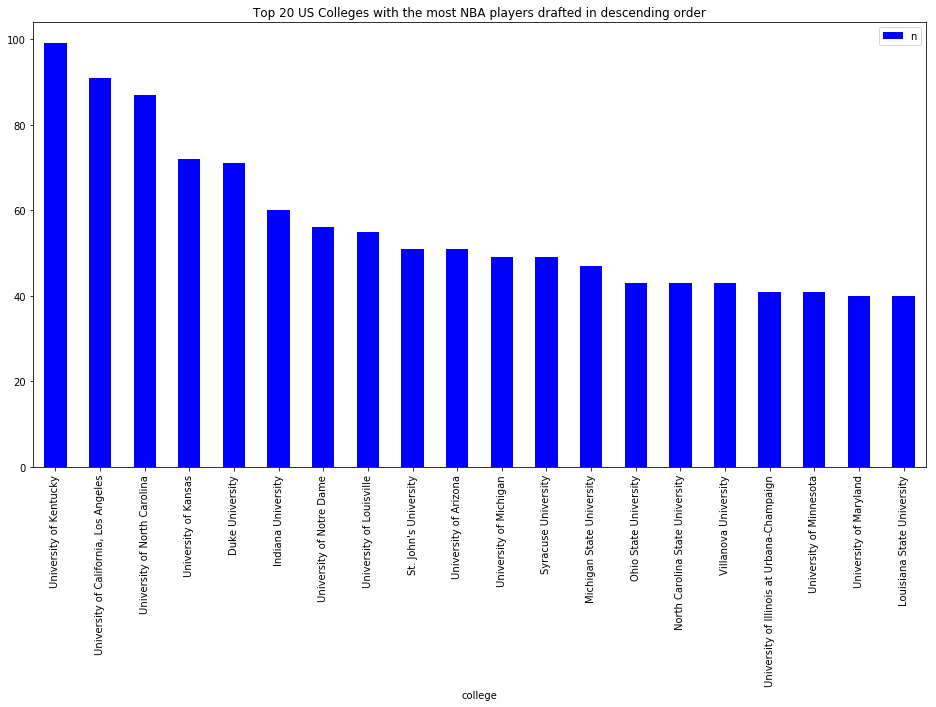

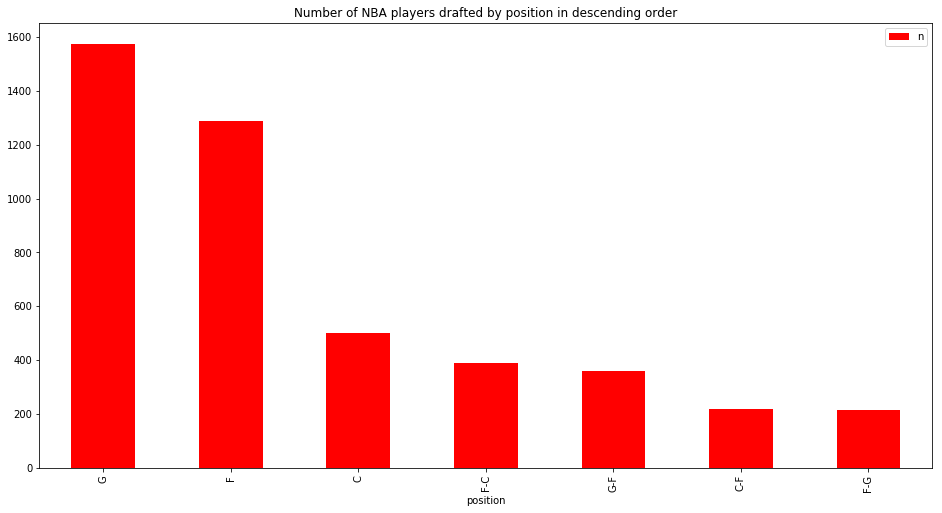

In [5]:
college = players.groupby(by = "college").size().reset_index(name = 'n')
college_sorted = college.sort_values('n', ascending = False)


fig = plt.figure(figsize=(16, 18))
ax = fig.add_subplot(211)
plt.title('Top 20 US Colleges with the most NBA players drafted in descending order')
college_sorted[:20].plot(kind='bar', x='college', y='n', ax=ax, color='blue')

position = players.groupby(by = "position").size().reset_index(name = 'n')
position_sorted = position.sort_values('n', ascending = False)

fig = plt.figure(figsize=(16, 18))
ax = fig.add_subplot(212)
plt.title('Number of NBA players drafted by position in descending order')
position_sorted.plot(kind='bar', x='position', y='n', ax=ax, color = 'red')

There is a vast difference between the how many NBA players come from the top 3 schools compared to the rest, with the top placed University of Kentucky having 99 NBA players as alumni.

For the positions of NBA players drafted, it is notable that many players who are drafted are pure to their roles ie only guards, forwards and centres. 
The hybrid positions are not as common especially C-F and F-G.

In [6]:
print(college_sorted.head())
print(position_sorted.head())

                                   college   n
357                 University of Kentucky  99
333  University of California, Los Angeles  91
381           University of North Carolina  87
356                   University of Kansas  72
96                         Duke University  71
  position     n
5        G  1574
2        F  1290
0        C   502
3      F-C   388
6      G-F   360


In [7]:
season['PPG'] = season['PTS']/season['G']
season['APG'] = season['AST']/season['G']
season['RPG'] = season['TRB']/season['G']
season['SPG'] = season['STL']/season['G']
season['ToPG'] = season['TOV']/season['G']
season['BPG'] = season['BLK']/season['G']

Here we created several columns which gave the average statistics per game which could serve as a better gauge and measure of consistency in the players.

In [8]:
season_clean = season.drop(['blanl', 'blank2', 'Unnamed: 0'], axis = 1)
season_clean.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,height,weight,birth_date,college,PPG,APG,RPG,SPG,ToPG,BPG
0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,...,5-11,170.0,"November 1, 1918",Indiana University,7.269841,2.793651,NaN,NaN,NaN,NaN
1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,...,6-2,185.0,"January 15, 1921",University of Kentucky,5.693878,2.224490,NaN,NaN,NaN,NaN
2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,...,6-4,190.0,"May 11, 1924",University of Notre Dame,6.537313,2.089552,NaN,NaN,NaN,NaN
3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,...,6-5,195.0,"October 8, 1925",North Carolina State University,4.200000,1.333333,NaN,NaN,NaN,NaN
4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,...,6-5,195.0,"October 8, 1925",North Carolina State University,4.538462,1.538462,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Average points per game by NBA players in descending order')

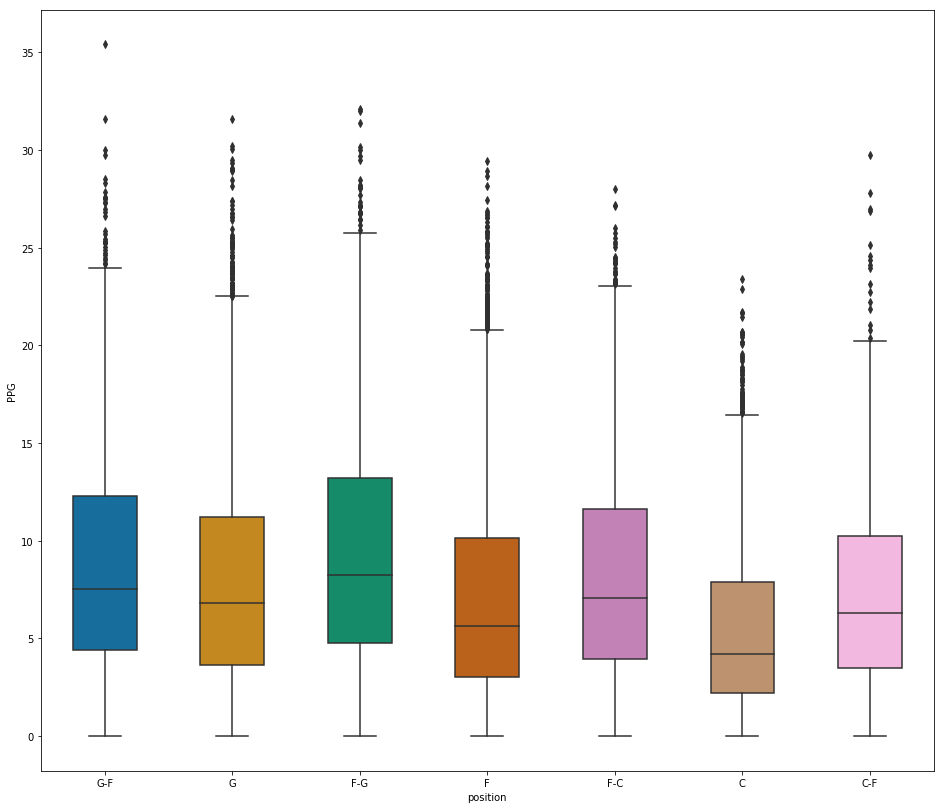

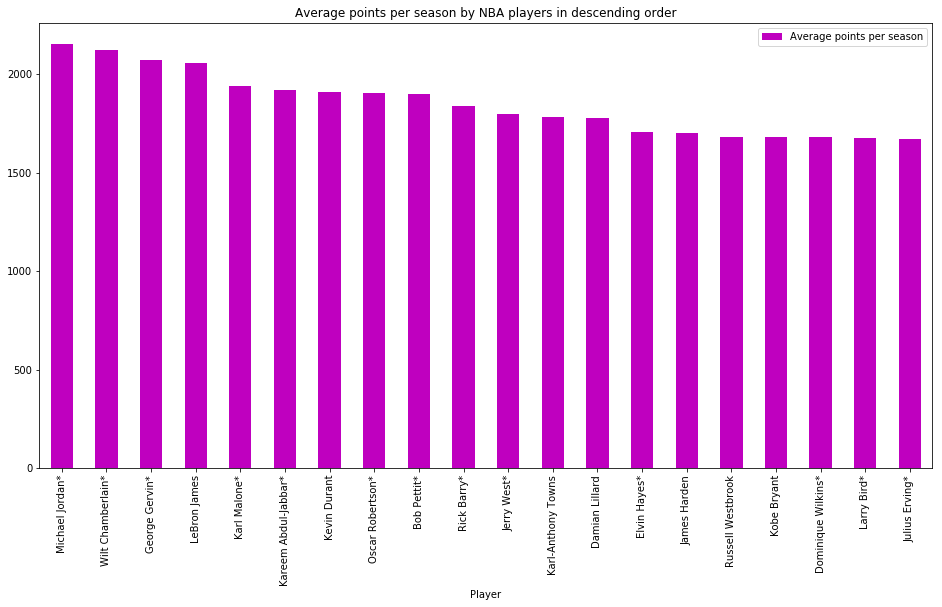

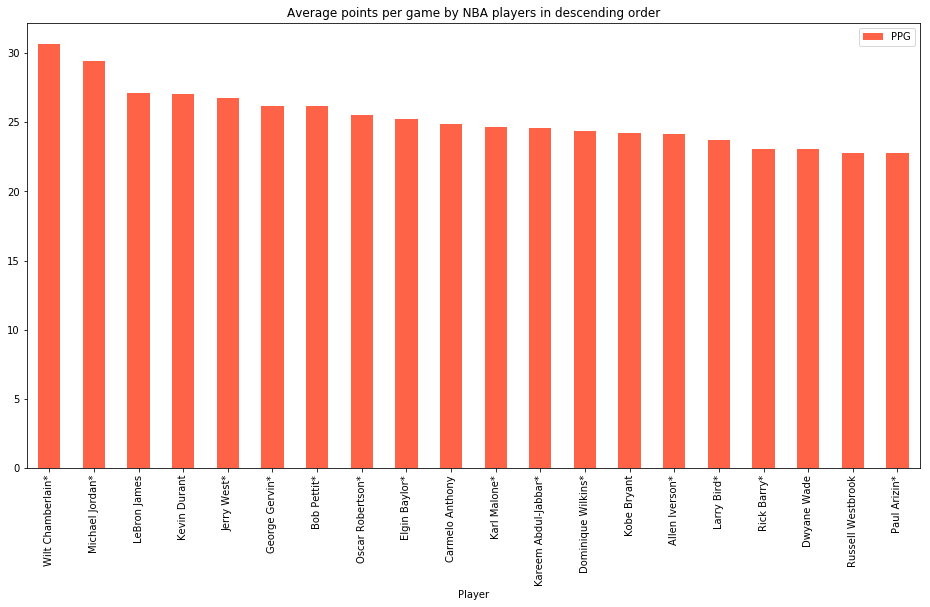

In [9]:
season_points_avg = season_clean.groupby('Player')['PTS'].mean().reset_index(name = 'PTS')
season_points_avg = season_points_avg.sort_values('PTS', ascending = False)

season_PPG = season_clean.groupby('Player')['PPG'].mean().reset_index(name = 'PPG')
season_PPG = season_PPG.sort_values('PPG', ascending = False)

fig = plt.figure(figsize=(16, 14))
bplot = sns.boxplot(y='PPG', x='position', 
                 data=season_clean, 
                 width=0.5,
                palette="colorblind")

fig = plt.figure(figsize=(16, 18))
ax = fig.add_subplot(211)
season_points_avg[:20].plot(kind='bar', x='Player', y='PTS', ax=ax, color='m')
ax.legend(['Average points per season'])
plt.title('Average points per season by NBA players in descending order')


fig = plt.figure(figsize=(16, 18))
ax3 = fig.add_subplot(212)
season_PPG[:20].plot(kind='bar', x='Player', y='PPG', ax=ax3, color='tomato')
plt.title('Average points per game by NBA players in descending order')

#https://matplotlib.org/gallery/api/two_scales.html

It is interesting to note that the __Guards and Forwards__ are the __more dominant scorers__ in the league.

Also, although Michael Jordan has the highest average points per season, Wilt Chamberlain has a higher average points scored per game.

In the top 10 average points per game, only Lebron James, Kevin Durant and Carmelo Anthony are __not hall of fame candidates__.
Whether there is a correlation between scoring ability and being a hall of fame candidate would require more information and analysis.

Text(0.5, 1.0, 'Average assists per game by NBA players in descending order')

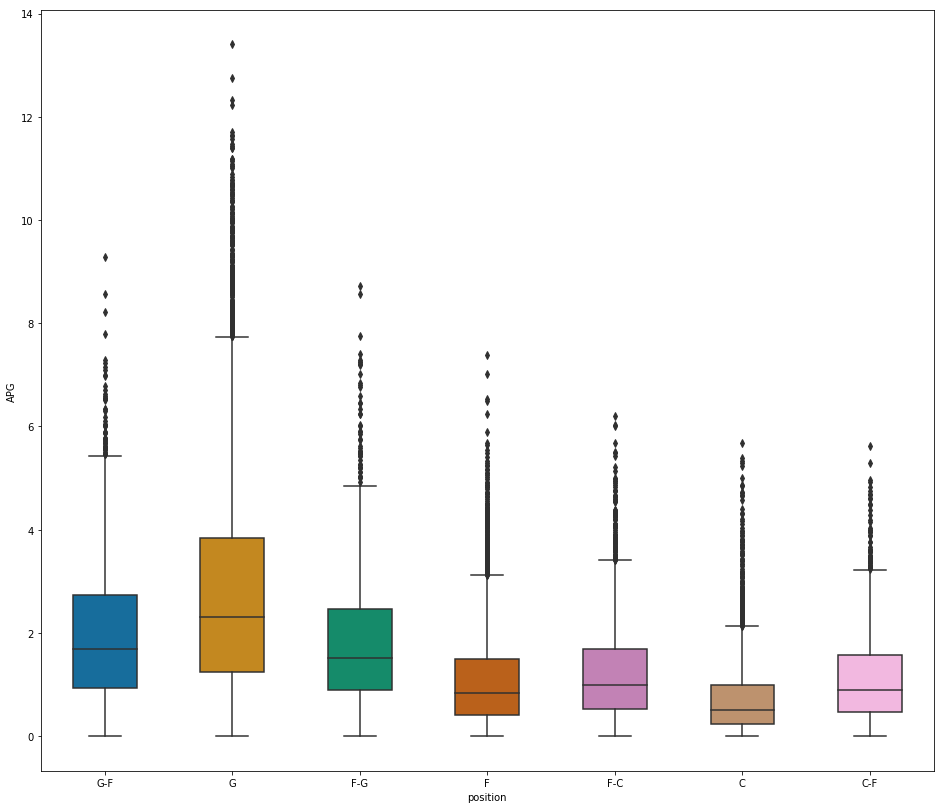

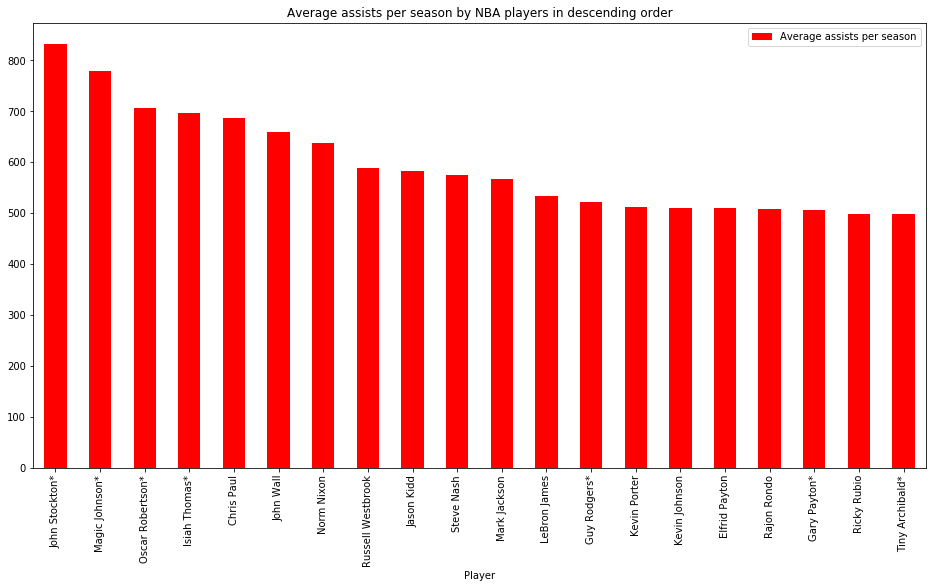

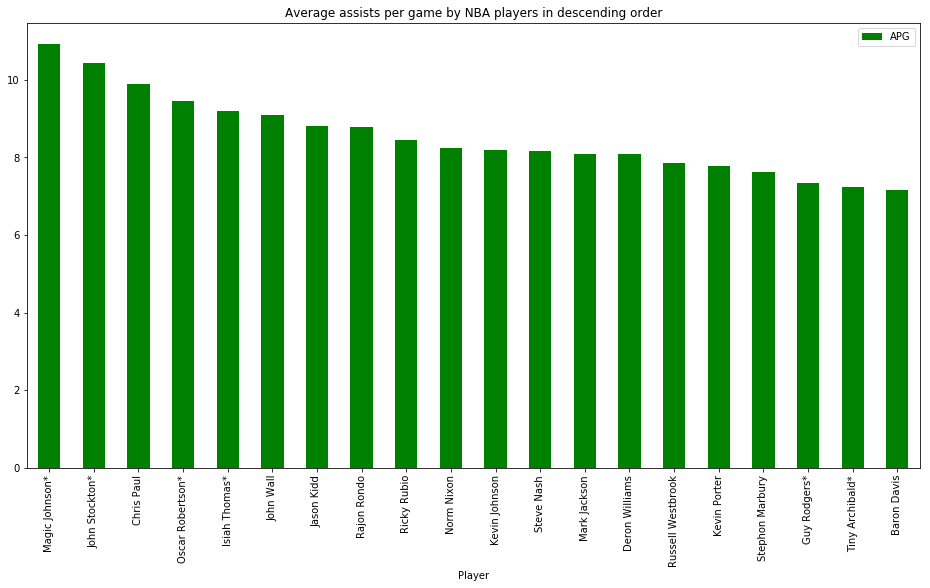

In [10]:
season_assist_avg = season_clean.groupby('Player')['AST'].mean().reset_index(name = 'AST')
season_assist_avg = season_assist_avg.sort_values('AST', ascending = False)

season_APG = season_clean.groupby('Player')['APG'].mean().reset_index(name = 'APG')
season_APG = season_APG.sort_values('APG', ascending = False)

fig = plt.figure(figsize=(16, 14))
bplot = sns.boxplot(y='APG', x='position', 
                 data=season_clean, 
                 width=0.5,
                palette="colorblind")

fig = plt.figure(figsize=(16, 18))
ax = fig.add_subplot(211)
season_assist_avg[:20].plot(kind='bar', x='Player', y='AST', ax=ax, color='r')
ax.legend(['Average assists per season'])
plt.title('Average assists per season by NBA players in descending order')


fig = plt.figure(figsize=(16, 18))
ax3 = fig.add_subplot(212)
season_APG[:20].plot(kind='bar', x='Player', y='APG', ax=ax3, color='g')
plt.title('Average assists per game by NBA players in descending order')

Pure guards clocked up a higher assist rate on average compared to their hybrid F-G and G-F counterparts.

Although John Stockon has the highest assist per season, Magic Johnson has the highest average assist per game.

In the top 5 average assists per game and average assists per season, it is notable that Chris Paul is the only player who is __not inducted in the hall of fame__. 

Text(0.5, 1.0, 'Average rebounds per game by NBA players in descending order')

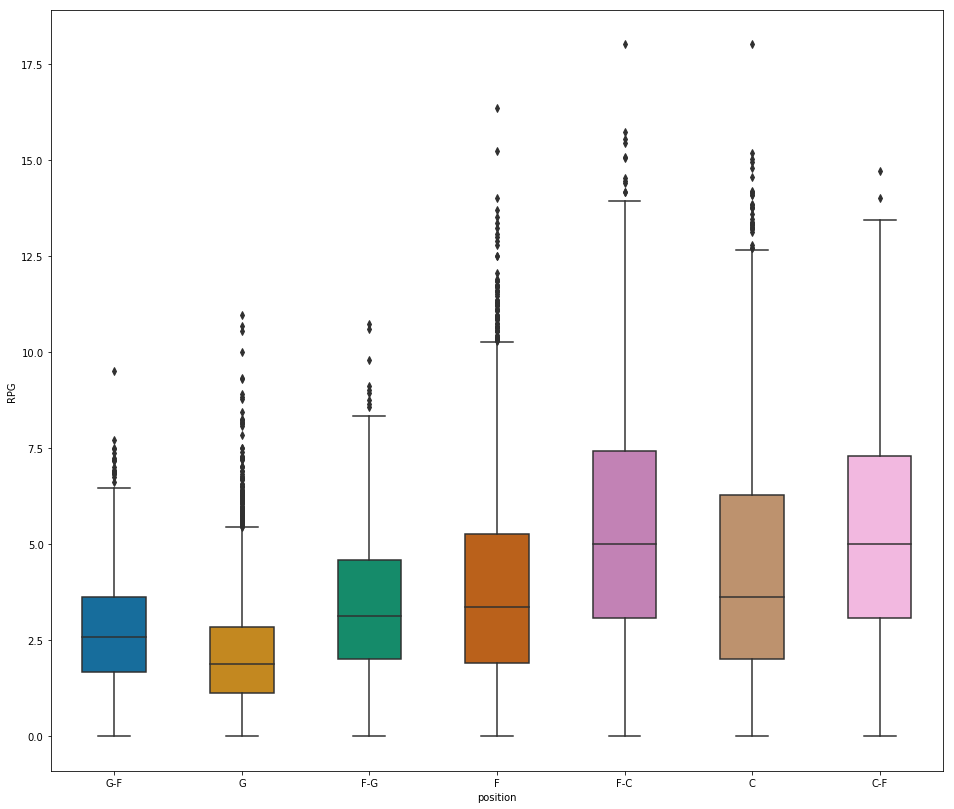

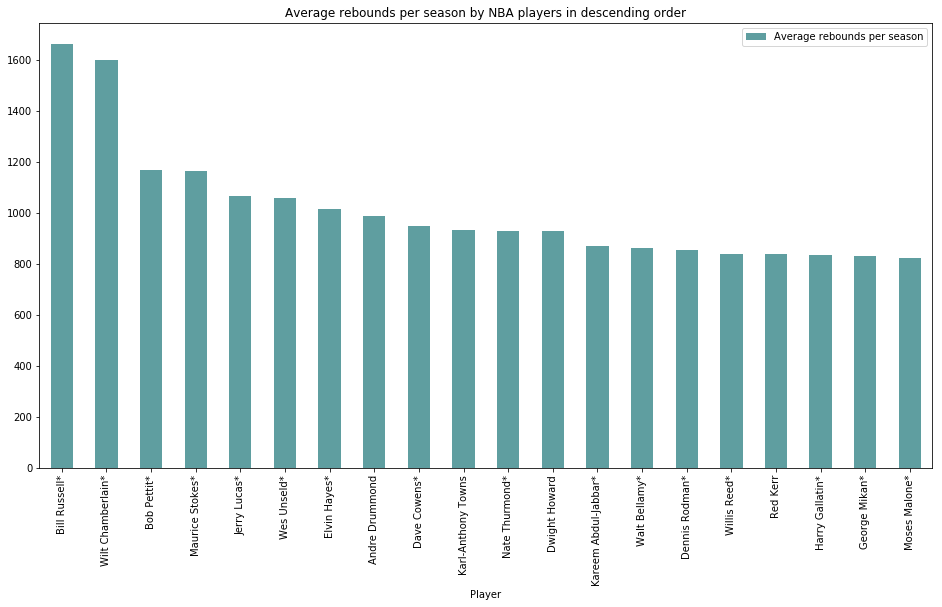

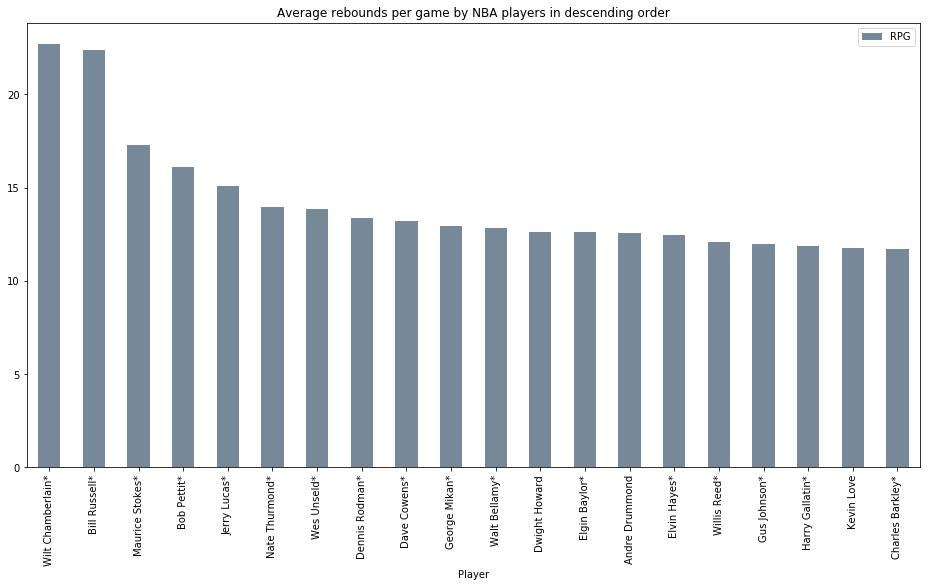

In [11]:
season_reb_avg = season_clean.groupby('Player')['TRB'].mean().reset_index(name = 'TRB')
season_reb_avg = season_reb_avg.sort_values('TRB', ascending = False)

season_RPG = season_clean.groupby('Player')['RPG'].mean().reset_index(name = 'RPG')
season_RPG = season_RPG.sort_values('RPG', ascending = False)

fig = plt.figure(figsize=(16, 14))
bplot = sns.boxplot(y='RPG', x='position', 
                 data=season_clean, 
                 width=0.5,
                palette="colorblind")

fig = plt.figure(figsize=(16, 18))
ax = fig.add_subplot(211)
season_reb_avg[:20].plot(kind='bar', x='Player', y='TRB', ax=ax, color='cadetblue')
ax.legend(['Average rebounds per season'])
plt.title('Average rebounds per season by NBA players in descending order')


fig = plt.figure(figsize=(16, 18))
ax3 = fig.add_subplot(212)
season_RPG[:20].plot(kind='bar', x='Player', y='RPG', ax=ax3, color='lightslategray')
plt.title('Average rebounds per game by NBA players in descending order')

For Wilt Chamberlain and Bill Russell, they are the __undisputed rebound leaders__ with an average of more of 20 rebounds per game in NBA history, way higher than the 3rd placed Maurice Stokes with about 17.5 RPG.

From the box and whiskers plot, it is an interesting find that some __guards and forwards__ are collecting many rebounds, close to or even exceeding __10 per game__, which is impressive for their position. 

                            OLS Regression Results                            
Dep. Variable:                    APG   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     3715.
Date:                Wed, 12 Jun 2019   Prob (F-statistic):          3.05e-149
Time:                        09:47:22   Log-Likelihood:                -404.93
No. Observations:                 244   AIC:                             811.9
Df Residuals:                     243   BIC:                             815.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ToPG           2.2126      0.036     60.948      0.0

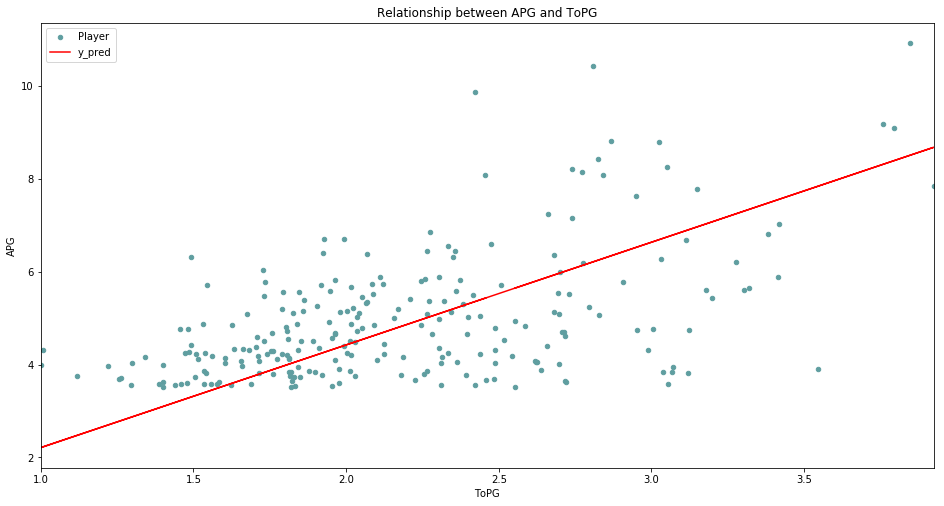

In [12]:
season_corr = season_clean.groupby('Player')['ToPG','APG'].mean().reset_index()
season_corr = season_corr[season_corr['APG'] > 3.5].dropna()

season_corr.head()
fig = plt.figure(figsize=(16, 18))
ax = fig.add_subplot(211)
season_corr.plot(kind='scatter', x='ToPG', y='APG', ax=ax, color='cadetblue')
ax.legend(['Player'])
plt.title('Relationship between APG and ToPG')

X = season_corr[['ToPG']]
y = season_corr[['APG']]
model = sm.OLS(y, X)
result = model.fit()
print(result.summary())
season_corr['y_pred'] = model.fit().fittedvalues
season_corr.plot(kind='line', x='ToPG', y='y_pred', ax=ax, color = 'r')

From this scatterplot, there is a mild linear correlation between the turnovers per game and assists per game, which is not a surprising find as to get an assist, a pass is required. Most turnovers are committed from passes.

Text(0.5, 1.0, 'Average steals per game by NBA players in descending order')

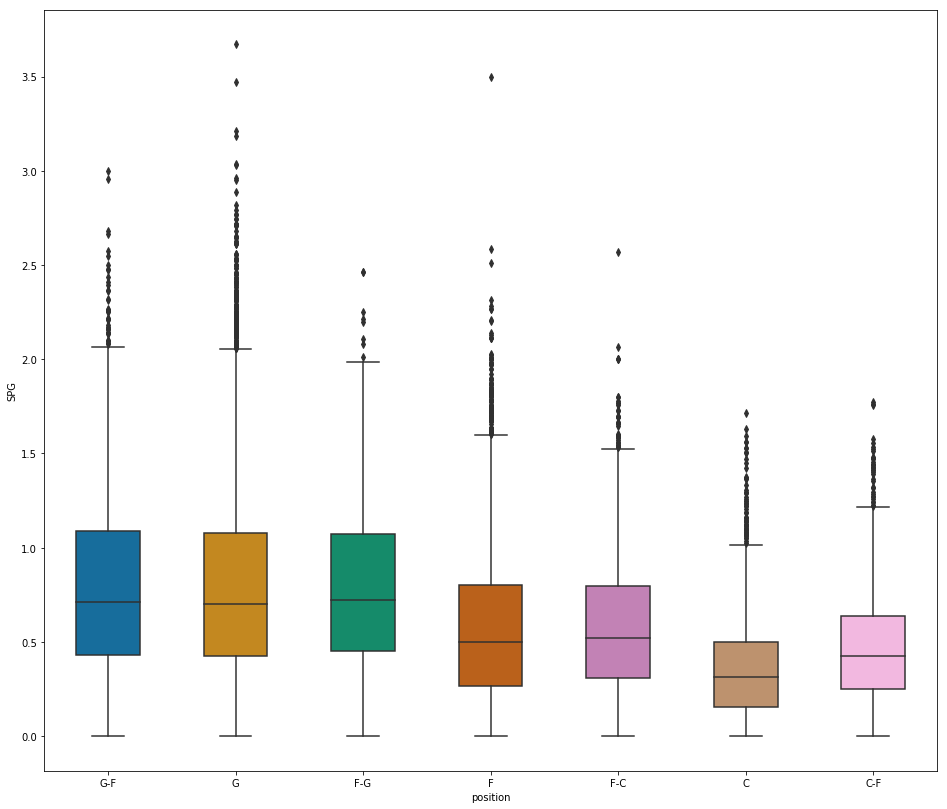

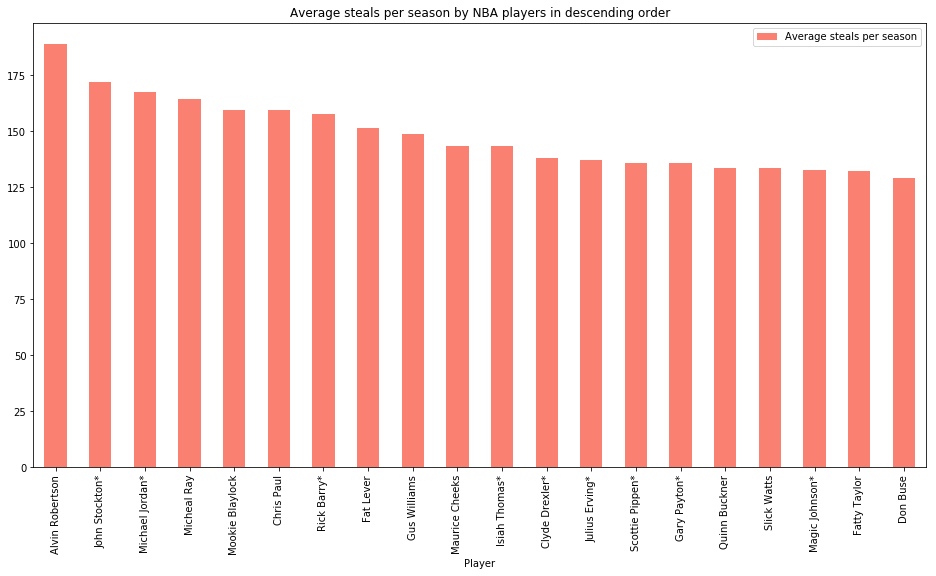

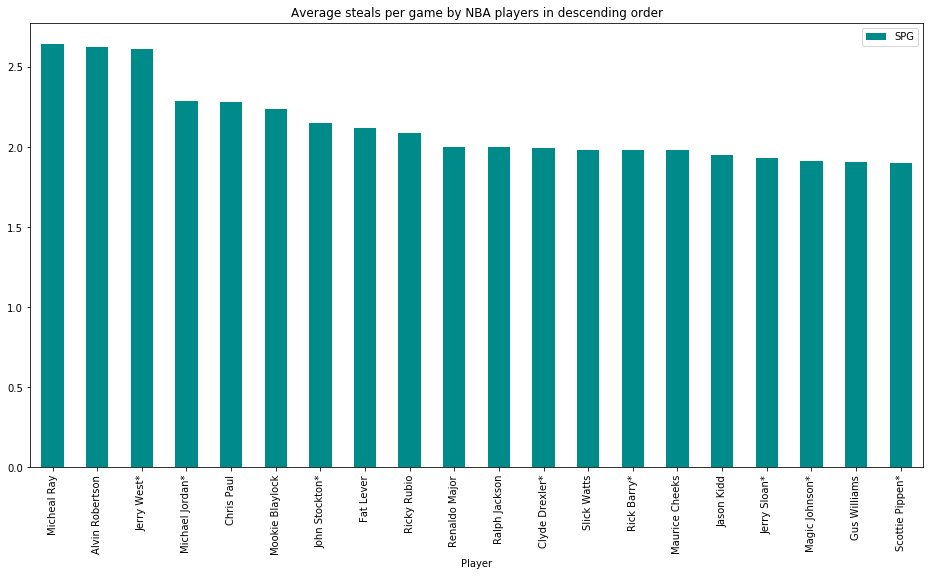

In [13]:
season_stl_avg = season_clean.groupby('Player')['STL'].mean().reset_index(name = 'STL')
season_stl_avg = season_stl_avg.sort_values('STL', ascending = False)

season_SPG = season_clean.groupby('Player')['SPG'].mean().reset_index(name = 'SPG')
season_SPG = season_SPG.sort_values('SPG', ascending = False)

fig = plt.figure(figsize=(16, 14))
bplot = sns.boxplot(y='SPG', x='position', 
                 data=season_clean, 
                 width=0.5,
                palette="colorblind")

fig = plt.figure(figsize=(16, 18))
ax = fig.add_subplot(211)
season_stl_avg[:20].plot(kind='bar', x='Player', y='STL', ax=ax, color='salmon')
ax.legend(['Average steals per season'])
plt.title('Average steals per season by NBA players in descending order')


fig = plt.figure(figsize=(16, 18))
ax3 = fig.add_subplot(212)
season_SPG[:20].plot(kind='bar', x='Player', y='SPG', ax=ax3, color='darkcyan')
plt.title('Average steals per game by NBA players in descending order')

From the box and whiskers plot, there is an anomaly coming from a forward whose primary role is not stealing.

The hybrid G-F and F-G as well as the pure guards have around the same mean of SPG.

Text(0.5, 1.0, 'Average steals per game by NBA players in descending order')

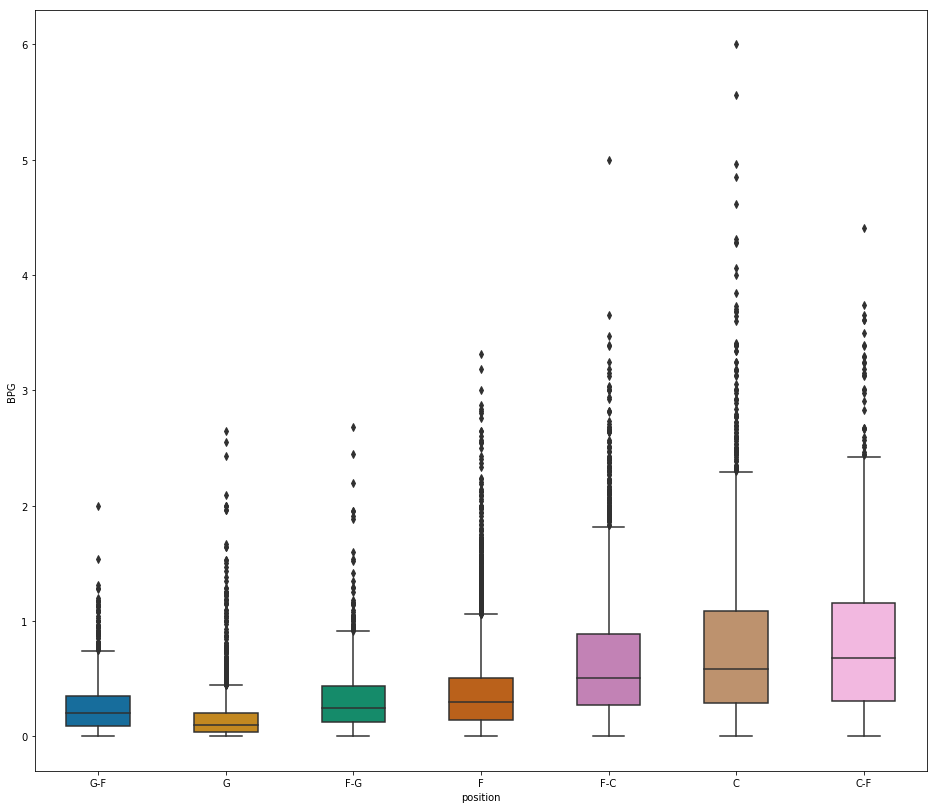

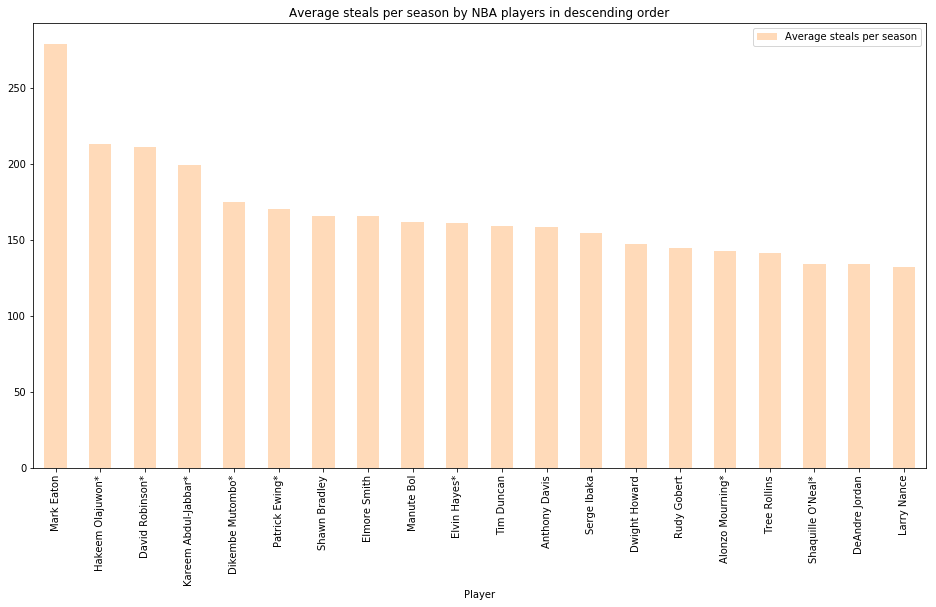

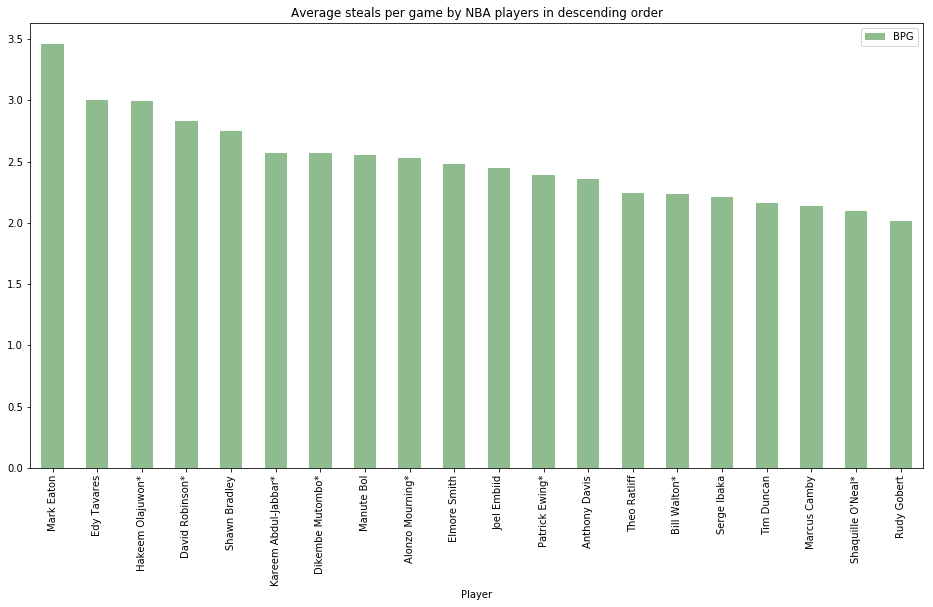

In [14]:
season_blk_avg = season_clean.groupby('Player')['BLK'].mean().reset_index(name = 'BLK')
season_blk_avg = season_blk_avg.sort_values('BLK', ascending = False)

season_BPG = season_clean.groupby('Player')['BPG'].mean().reset_index(name = 'BPG')
season_BPG = season_BPG.sort_values('BPG', ascending = False)

fig = plt.figure(figsize=(16, 14))
bplot = sns.boxplot(y='BPG', x='position', 
                 data=season_clean, 
                 width=0.5,
                palette="colorblind")

fig = plt.figure(figsize=(16, 18))
ax = fig.add_subplot(211)
season_blk_avg[:20].plot(kind='bar', x='Player', y='BLK', ax=ax, color='peachpuff')
ax.legend(['Average steals per season'])
plt.title('Average steals per season by NBA players in descending order')


fig = plt.figure(figsize=(16, 18))
ax3 = fig.add_subplot(212)
season_BPG[:20].plot(kind='bar', x='Player', y='BPG', ax=ax3, color='darkseagreen')
plt.title('Average steals per game by NBA players in descending order')

Mark Eaton leads the league in blocks per season with the runner up being more than 50 blocks away.

It is not surprising to note that guards have the least amount of blocks due to their height while centres have the most blocks.

Text(0.5, 1.0, 'Average turnovers per game by NBA players in descending order')

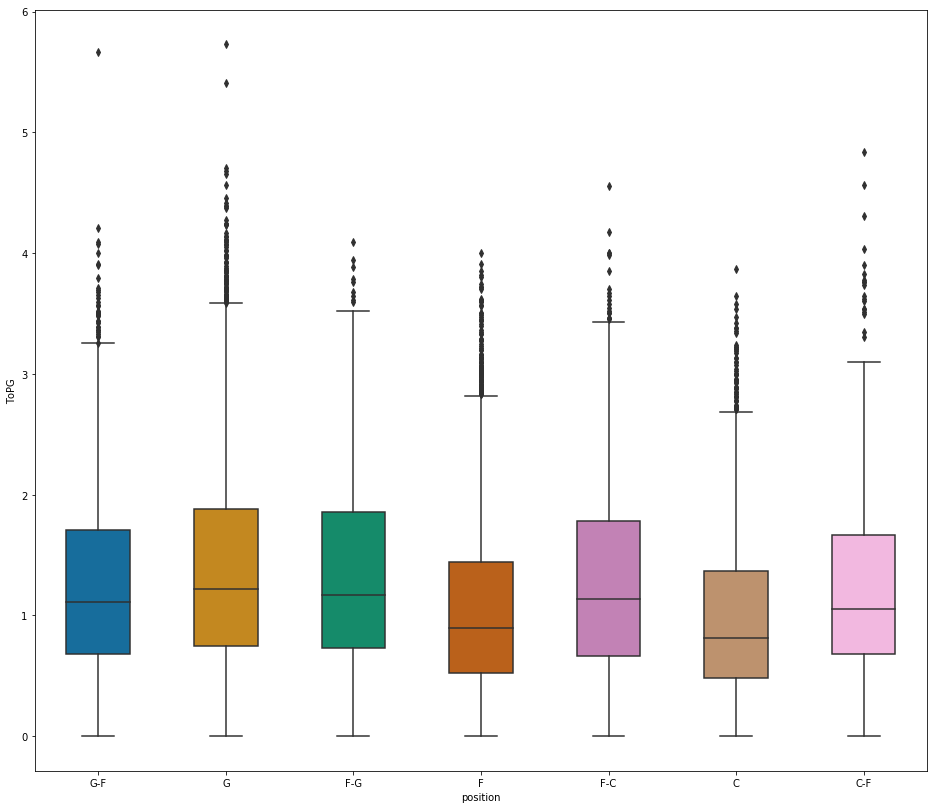

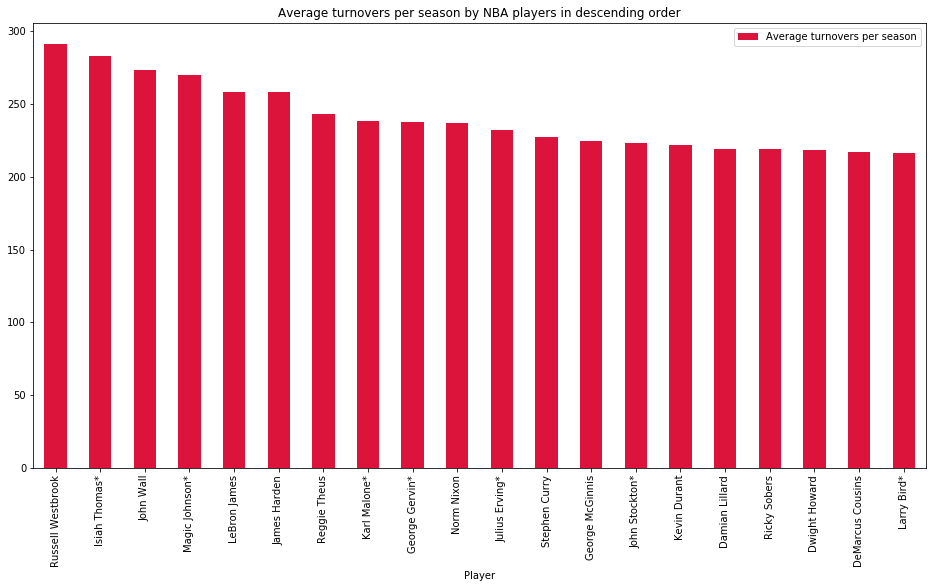

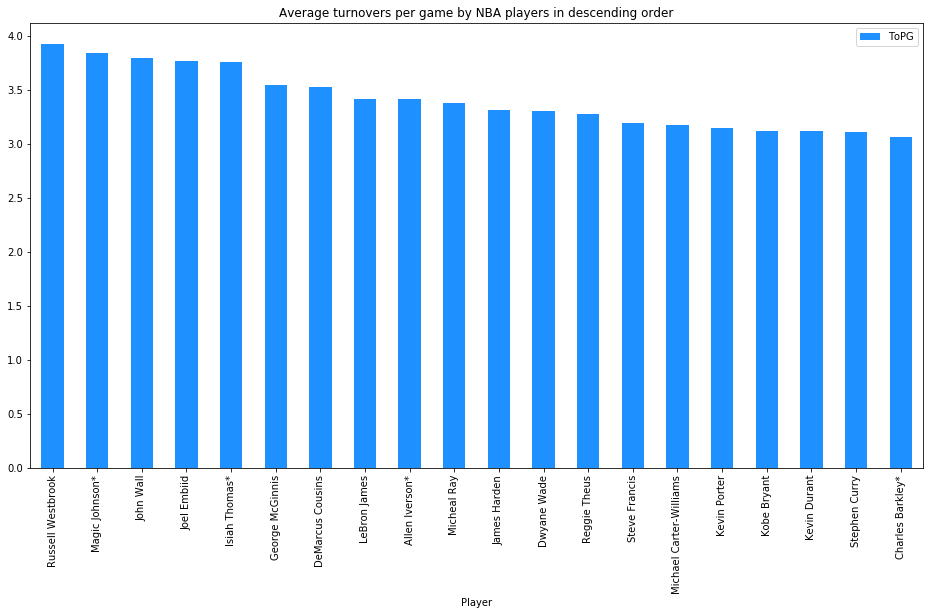

In [15]:
season_TO_avg = season_clean.groupby('Player')['TOV'].mean().reset_index(name = 'TOV')
season_TO_avg = season_TO_avg.sort_values('TOV', ascending = False)

season_ToPG = season_clean.groupby('Player')['ToPG'].mean().reset_index(name = 'ToPG')
season_ToPG = season_ToPG.sort_values('ToPG', ascending = False)

fig = plt.figure(figsize=(16, 14))
bplot = sns.boxplot(y='ToPG', x='position', 
                 data=season_clean, 
                 width=0.5,
                palette="colorblind")

fig = plt.figure(figsize=(16, 18))
ax = fig.add_subplot(211)
season_TO_avg[:20].plot(kind='bar', x='Player', y='TOV', ax=ax, color='crimson')
ax.legend(['Average turnovers per season'])
plt.title('Average turnovers per season by NBA players in descending order')


fig = plt.figure(figsize=(16, 18))
ax3 = fig.add_subplot(212)
season_ToPG[:20].plot(kind='bar', x='Player', y='ToPG', ax=ax3, color='dodgerblue')
plt.title('Average turnovers per game by NBA players in descending order')

It is not a call for concern with many guards and G-F making this list however it is worth to note that there are players making close to __6 ToPG, even for C-F players__.

                  Player         % position                          college
0   Sarunas Jasikevicius  0.907121        G           University of Maryland
1          Brian Roberts  0.906475        G             University of Dayton
2     Mahmoud Abdul-Rauf  0.905254        G       Louisiana State University
3             Steve Nash  0.904255        G           Santa Clara University
4             Mark Price  0.903895        G  Georgia Institute of Technology
5          Stephen Curry  0.900995        G                 Davidson College
6       Ernie DiGregorio  0.898897        G               Providence College
8              Ray Allen  0.895347        G        University of Connecticut
9       Chauncey Billups  0.895010        G           University of Colorado
10           J.J. Redick  0.889385        G                  Duke University
11          Scott Skiles  0.889144        G        Michigan State University
12           Kyle Korver  0.883959      G-F             Creighton University

Text(0.5, 1.0, 'Bottom 20 average free throw percentage by college')

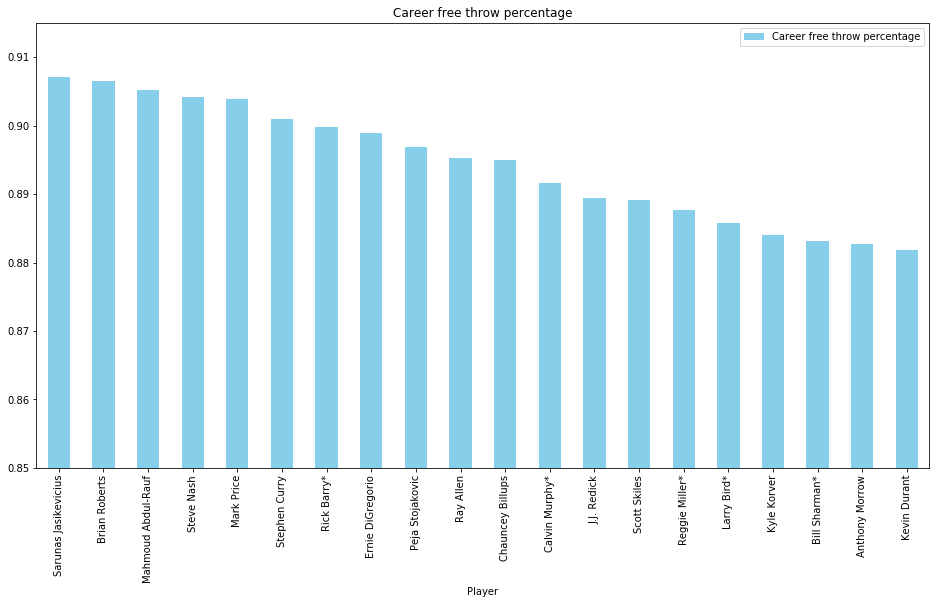

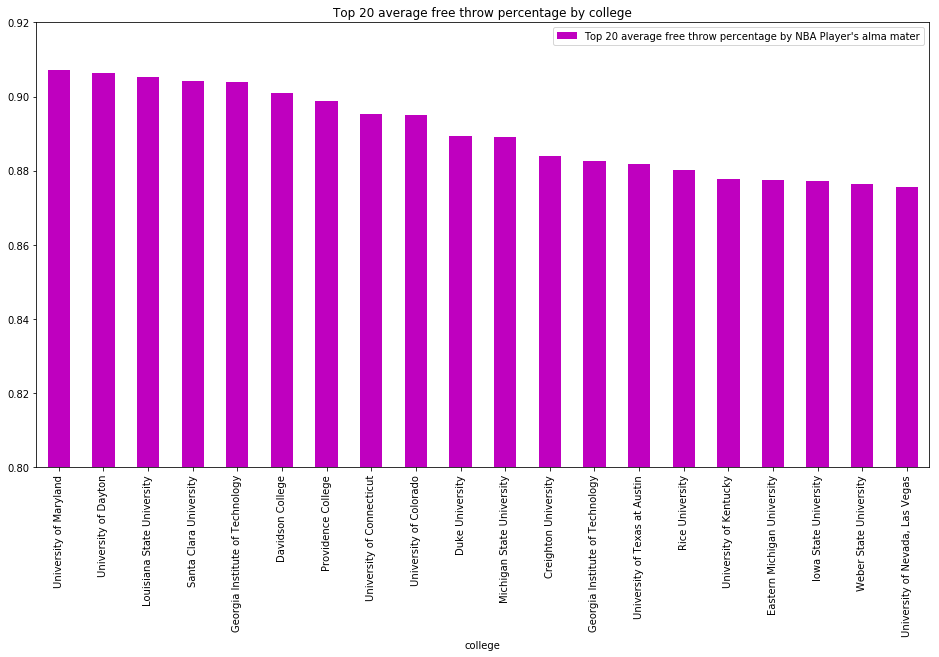

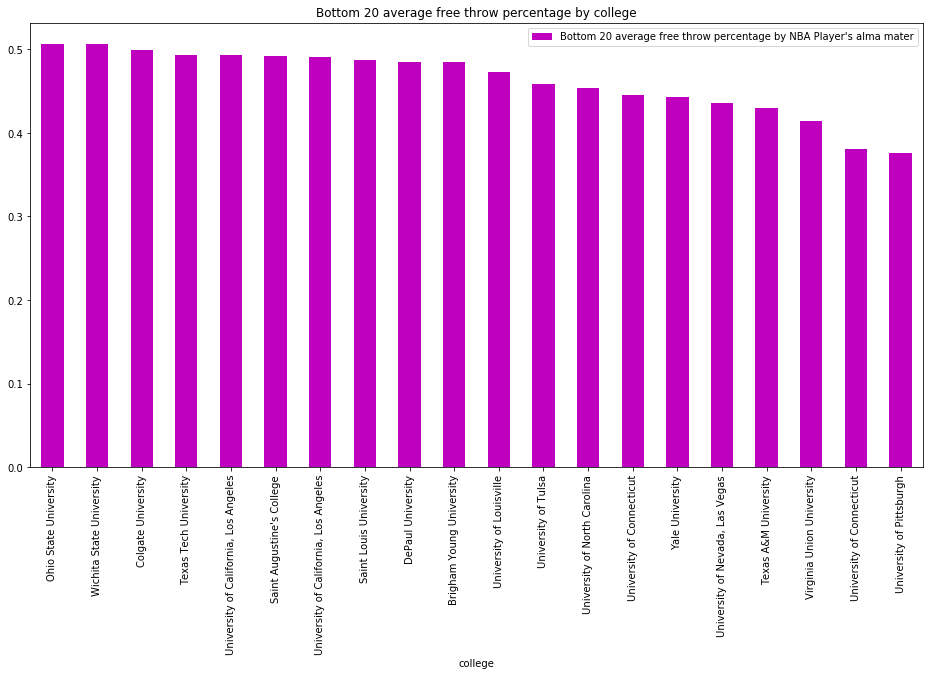

In [22]:
#FT vs College

season_FT_avg = season_clean.groupby(['Player'])['FTA','FT'].sum()
season_FT_avg = season_FT_avg[season_FT_avg['FTA'] > 300]
season_FT_avg['%'] = season_FT_avg['FT']/season_FT_avg['FTA']
season_FT_avg = season_FT_avg.sort_values('%', ascending = False)
season_FT_avg = season_FT_avg.drop(columns = ['FTA','FT'])
season_FT_avg = season_FT_avg.reset_index()

fig = plt.figure(figsize=(16, 18))
ax = fig.add_subplot(211)
season_FT_avg[:20].plot(kind='bar', x='Player', y='%', ax=ax, color='skyblue')
plt.ylim(0.85,0.915)
ax.legend(['Career free throw percentage'])
plt.title('Career free throw percentage')

season_FT_college = pd.merge(season_FT_avg, players)
season_FT_college = season_FT_college.dropna()
season_FT_college = season_FT_college.drop(columns = ['year_start', 'year_end', 'height', 'weight', 'birth_date'])
print(season_FT_college.head(20))


season_FT_college2 = season_FT_college[season_FT_college['%'] > 0.85]
season_FT_college2 = season_FT_college2.groupby(['college'])['%'].mean().reset_index(name = "%")
season_FT_college2 = season_FT_college2.sort_values('%', ascending = False)

fig = plt.figure(figsize=(16, 18))
ax = fig.add_subplot(211)
season_FT_college[:20].plot(kind='bar', x='college', y='%', ax=ax, color='m')
plt.ylim(0.80,0.92)
ax.legend(['Top 20 average free throw percentage by NBA Player\'s alma mater'])
plt.title('Top 20 average free throw percentage by college')

fig = plt.figure(figsize=(16, 18))
ax = fig.add_subplot(211)
season_FT_college[-20:].plot(kind='bar', x='college', y='%', ax=ax, color='m')
# plt.ylim(0.80,0.92)
ax.legend(['Bottom 20 average free throw percentage by NBA Player\'s alma mater'])
plt.title('Bottom 20 average free throw percentage by college')

We only took into account players who had have >300 free throw attempts.

There seems to be a correlation between the free throw capabilities and the alumni.

It is also interesting to see that the top 20 free throw shooters are dominated by guards.

We'll now analyse if there is a relationship between the positions of the players and their free throw pecentages.

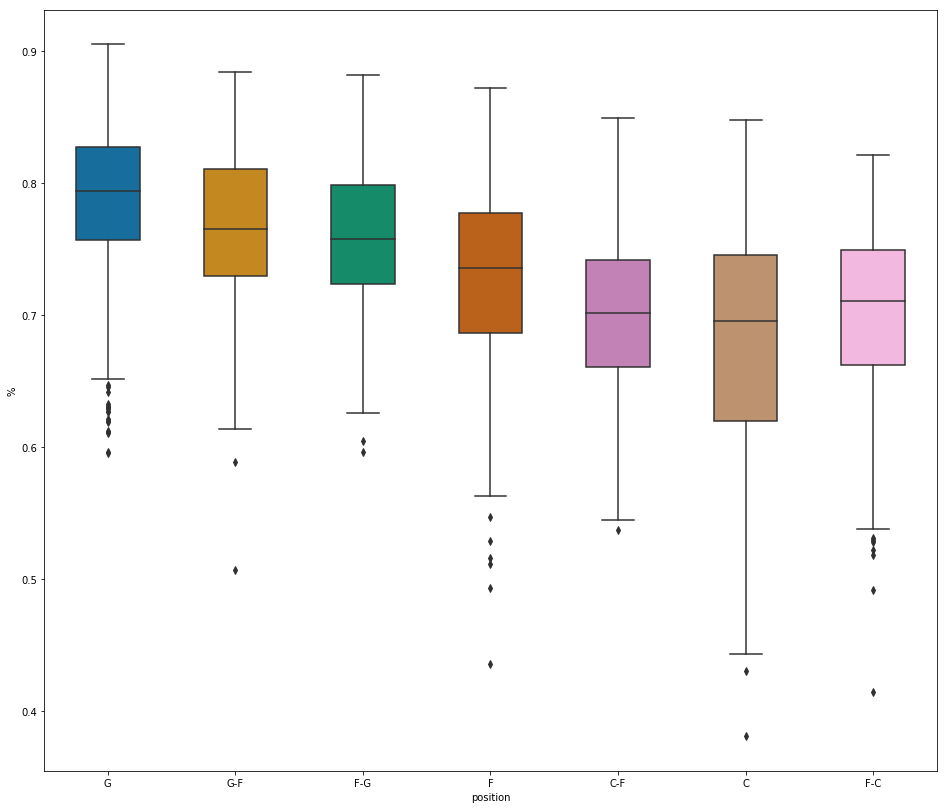

In [17]:
fig = plt.figure(figsize=(16, 14))

bplot = sns.boxplot(y='%', x='position', 
                 data=season_FT_college, 
                 width=0.5,
                palette="colorblind")

From the box plot, the shorter players on average have a better fre throw shooting capability.

Centres seem to have poor free throw abilities with their box diagram having an extended wisker even to under 50%, while even having a player with under 40%.

  position         %
5        G  0.785614
6      G-F  0.764710
4      F-G  0.754667
2        F  0.726043
3      F-C  0.700041


Text(0.5, 1.0, 'Average free throw percentage by centres')

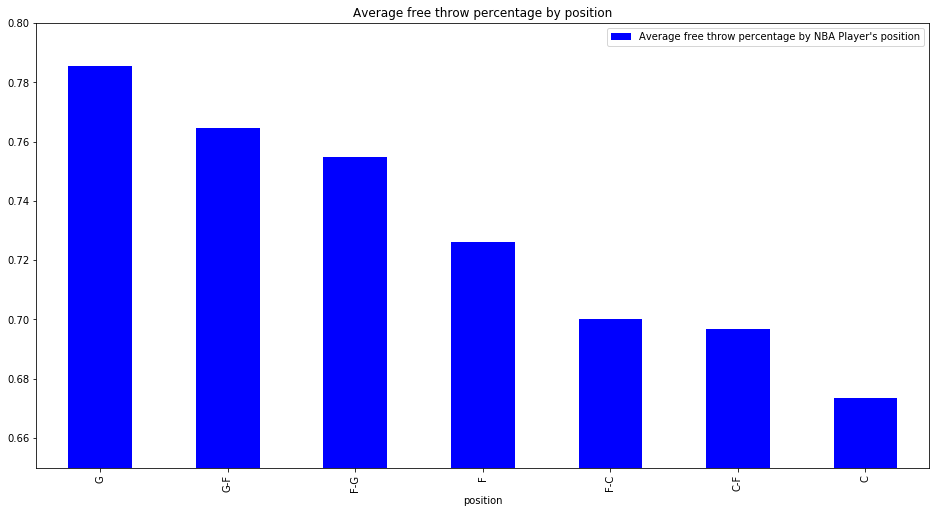

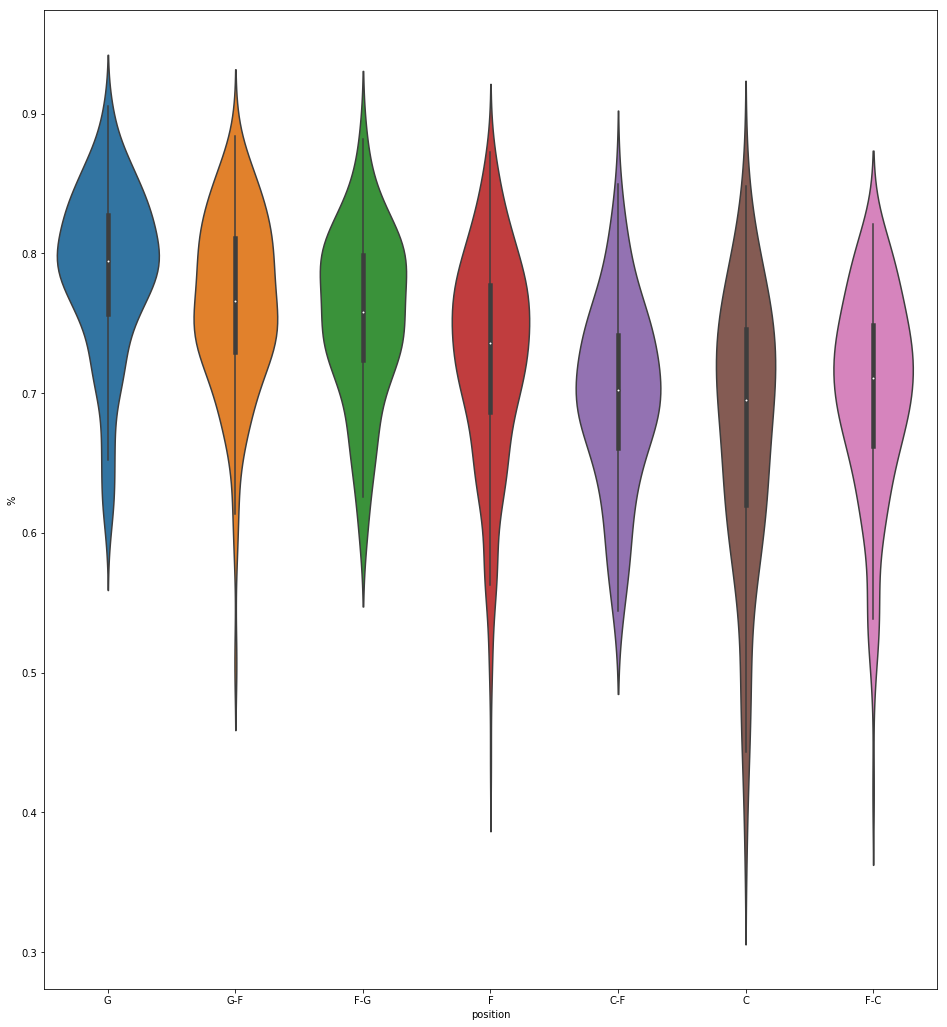

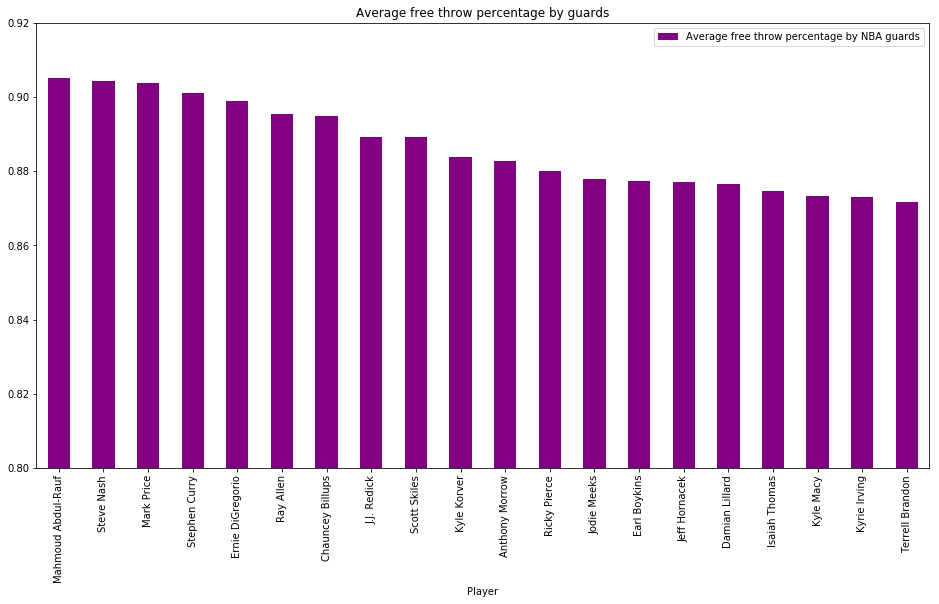

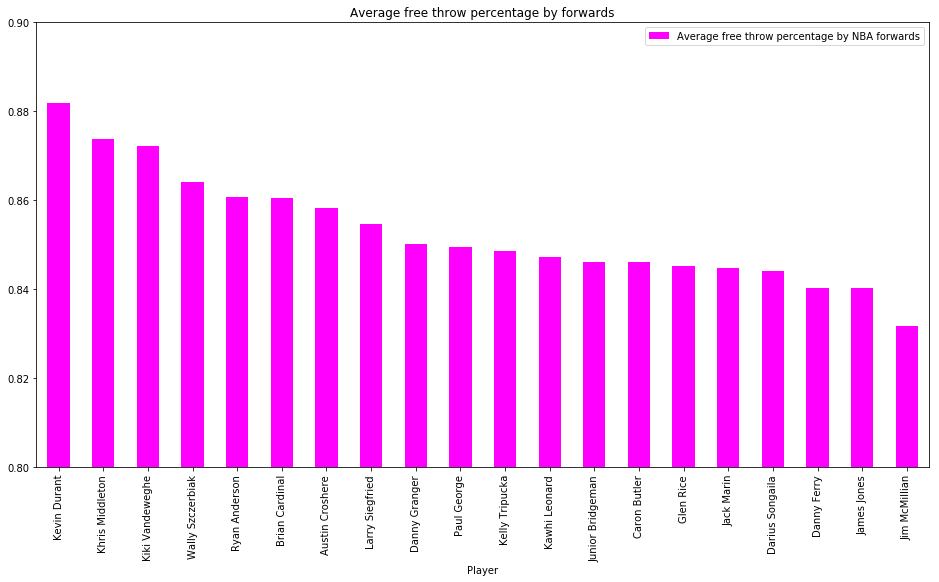

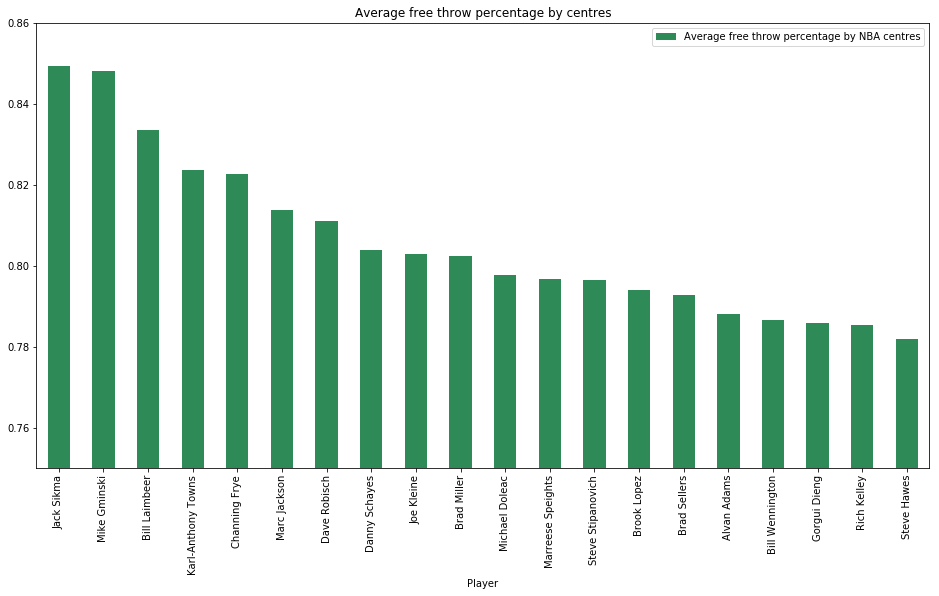

In [18]:
season_FT_position = season_FT_college.groupby(['position'])['%'].mean().reset_index(name = "%")
season_FT_position = season_FT_position.sort_values('%', ascending = False)
print(season_FT_position.head())
fig = plt.figure(figsize=(16, 18))
ax = fig.add_subplot(211)
season_FT_position.plot(kind='bar', x='position', y='%', ax=ax, color='b')
plt.ylim(0.65,0.80)
ax.legend(['Average free throw percentage by NBA Player\'s position'])
plt.title('Average free throw percentage by position')

fig = plt.figure(figsize=(16, 18))
sns.violinplot(x="position", y="%", data=season_FT_college)

season_FT_guard = season_FT_college[(season_FT_college['position'] == 'G') | (season_FT_college['position'] == 'G-F')]
season_FT_guard = season_FT_guard.groupby(['Player'])['%'].mean().reset_index(name = "%")
season_FT_guard = season_FT_guard.sort_values('%', ascending = False)
fig = plt.figure(figsize=(16, 18))
ax = fig.add_subplot(211)
season_FT_guard[:20].plot(kind='bar', x='Player', y='%', ax=ax, color='purple')
plt.ylim(0.80,0.92)
ax.legend(['Average free throw percentage by NBA guards'])
plt.title('Average free throw percentage by guards')



season_FT_forward = season_FT_college[(season_FT_college['position'] == 'F') | (season_FT_college['position'] == 'F-C') \
                                      | (season_FT_college['position'] == 'F-G')]
season_FT_forward = season_FT_forward.groupby(['Player'])['%'].mean().reset_index(name = "%")
season_FT_forward = season_FT_forward.sort_values('%', ascending = False)
fig = plt.figure(figsize=(16, 18))
ax = fig.add_subplot(211)
season_FT_forward[:20].plot(kind='bar', x='Player', y='%', ax=ax, color='fuchsia')
plt.ylim(0.80,0.90)
ax.legend(['Average free throw percentage by NBA forwards'])
plt.title('Average free throw percentage by forwards')



season_FT_centre = season_FT_college[(season_FT_college['position'] == 'C') | (season_FT_college['position'] == 'C-F')]
season_FT_centre = season_FT_centre.groupby(['Player'])['%'].mean().reset_index(name = "%")
season_FT_centre = season_FT_centre.sort_values('%', ascending = False)
fig = plt.figure(figsize=(16, 18))
ax = fig.add_subplot(211)
season_FT_centre[:20].plot(kind='bar', x='Player', y='%', ax=ax, color='seagreen')
plt.ylim(0.75,0.86)
ax.legend(['Average free throw percentage by NBA centres'])
plt.title('Average free throw percentage by centres')

                            OLS Regression Results                            
Dep. Variable:                    FT%   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 3.959e+04
Date:                Wed, 12 Jun 2019   Prob (F-statistic):               0.00
Time:                        10:04:59   Log-Likelihood:                 533.44
No. Observations:                 599   AIC:                            -1065.
Df Residuals:                     598   BIC:                            -1060.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
3P%            2.2780      0.011    198.983      0.0

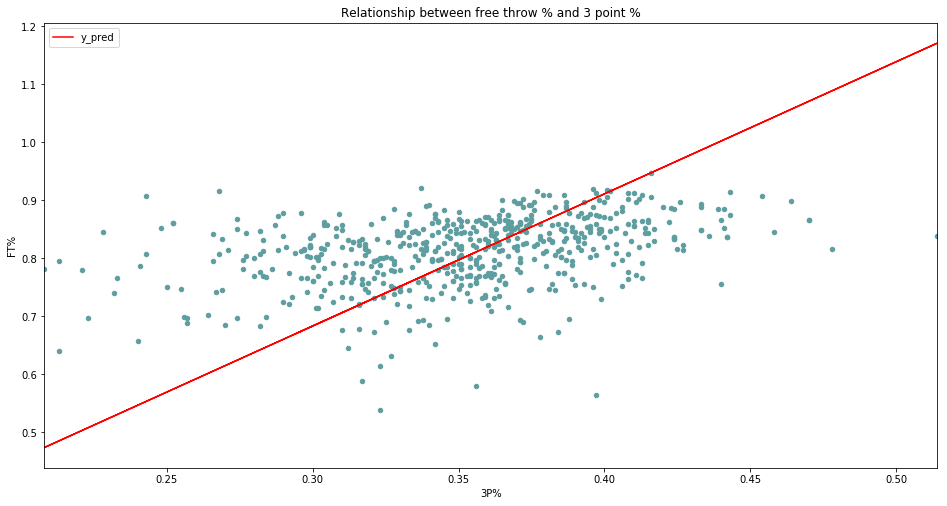

In [42]:
fig = plt.figure(figsize=(16, 18))
ax = fig.add_subplot(211)
season_compare = season_clean[(season_clean['FTA'] > 300) & (season_clean['3PA'] > 100)].dropna()
season_compare.plot(kind='scatter', x='3P%', y='FT%', ax=ax, color='cadetblue')
plt.title('Relationship between free throw % and 3 point %')

X = season_compare['3P%']
y = season_compare[['FT%']]
model = sm.OLS(y, X)
result = model.fit()
print(result.summary())
season_compare['y_pred'] = model.fit().fittedvalues
season_compare.plot(kind='line', x='3P%', y='y_pred', ax=ax, color = 'r')